# Derive an empirical BarShadow calibration

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import astropy.io.fits as pyfits

from tqdm import tqdm
import scipy.ndimage as nd

import eazy

import grizli
from grizli import utils

import msaexp
import msaexp.slit_combine
import msaexp.utils

print('grizli: ', grizli.__version__)
print('msaexp: ', msaexp.__version__)


grizli:  1.11.4
msaexp:  0.7.7.dev1+g945f187.d20240503


In [2]:
try:
    os.chdir('/Users/gbrammer/Research/JWST/Projects/NIRSpec/FlagStuckClosed')
except:
    pass

print(os.getcwd())

/Users/gbrammer/Research/JWST/Projects/NIRSpec/FlagStuckClosed


## Sync slit cutouts for two RUBIES (GO-4233) masks

In [3]:
for root in ['rubies-egs61-v3', 'rubies-egs62-v3']:
    print(f'# sync from {root}')
    os.system(f'aws s3 sync s3://msaexp-nirspec/extractions/slitlets/{root}/ ./ --exclude "*" --include "*phot.*_m*.fits"')
    

# sync from rubies-egs61-v3
# sync from rubies-egs62-v3


In [4]:
files = glob.glob('jw*4233_m*fits')

files.sort()
files = np.array(files)
keys = [f.split('_')[3] + '.' + f.split('.')[1] for f in files]
un = utils.Unique(keys)

   N  value     
====  ==========
   2  nrs1.154  
   2  nrs1.165  
   2  nrs2.041  
   3  nrs1.109  
   3  nrs2.052  
   3  nrs2.050  
   3  nrs2.049  
   3  nrs2.048  
   3  nrs2.043  
   3  nrs2.042  
   3  nrs2.037  
   3  nrs2.036  
   3  nrs2.030  
   3  nrs2.027  
   3  nrs2.026  
   3  nrs2.025  
   3  nrs2.053  
   3  nrs2.054  
   3  nrs2.056  
   3  nrs2.023  
   3  nrs2.093  
   3  nrs2.092  
   3  nrs2.088  
   3  nrs2.087  
   3  nrs2.080  
   3  nrs2.078  
   3  nrs2.055  
   3  nrs2.075  
   3  nrs2.069  
   3  nrs2.067  
   3  nrs2.064  
   3  nrs2.060  
   3  nrs2.058  
   3  nrs2.057  
   3  nrs2.073  
   3  nrs2.097  
   3  nrs2.022  
   3  nrs1.215  
   3  nrs1.212  
   3  nrs1.210  
   3  nrs1.209  
   3  nrs1.204  
   3  nrs1.202  
   3  nrs1.199  
   3  nrs2.021  
   3  nrs1.194  
   3  nrs1.185  
   3  nrs1.174  
   3  nrs1.119  
   3  nrs1.118  
   3  nrs1.114  
   3  nrs1.110  
   3  nrs1.193  
   3  nrs1.217  
   3  nrs2.110  
   3  nrs2.019  
   3  nrs2.003

## Read into `msaexp.slit_combine.SlitGroup` objects

In [5]:
bobj = {}
for k in un.values:
    # if k not in ['nrs2.110']:
    #     continue
    
    if un[k].sum() == 3:
        _obj = msaexp.slit_combine.SlitGroup(files[un[k]], 'test', position_key='y_index',
                                            undo_pathloss=True,
                                            trace_with_ypos=True, 
                                            trace_from_yoffset=True,
                                            stuck_min_sn=-100,
                                            nod_offset=None)

        if _obj.sh[1] > 100:
            bobj[k] = _obj
            obj = _obj

 0 jw04233006001_03101_00002_nrs1_phot.109.4233_m45.fits (24, 289)
 1 jw04233006001_03101_00003_nrs1_phot.109.4233_m45.fits (24, 289)
 2 jw04233006001_03101_00004_nrs1_phot.109.4233_m45.fits (24, 289)
   jw04233006001_03101_00002_nrs1_phot.109.4233_m45.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00003_nrs1_phot.109.4233_m45.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00004_nrs1_phot.109.4233_m45.fits source_type=None PATHLOSS_UN
 Recomputed offsets slit: force [ 0.00,  4.91, -4.91] pix offsets


/Users/gbrammer/miniconda3/envs/jw310-2024/lib/python3.10/site-packages/msaexp/slit_combine.py:1004: RuntimeWarning: overflow encountered in multiply
  self.var_flat[j, :] *= phot_scl**2


 0 jw04233006002_03101_00002_nrs1_phot.110.4233_m78.fits (24, 271)
 1 jw04233006002_03101_00003_nrs1_phot.110.4233_m78.fits (24, 271)
 2 jw04233006002_03101_00004_nrs1_phot.110.4233_m78.fits (24, 271)
   jw04233006002_03101_00002_nrs1_phot.110.4233_m78.fits source_type=None PATHLOSS_UN
   jw04233006002_03101_00003_nrs1_phot.110.4233_m78.fits source_type=None PATHLOSS_UN
   jw04233006002_03101_00004_nrs1_phot.110.4233_m78.fits source_type=None PATHLOSS_UN
 Recomputed offsets slit: force [ 0.00,  4.92, -4.92] pix offsets


/Users/gbrammer/miniconda3/envs/jw310-2024/lib/python3.10/site-packages/msaexp/slit_combine.py:1004: RuntimeWarning: overflow encountered in multiply
  self.var_flat[j, :] *= phot_scl**2


 0 jw04233006001_03101_00002_nrs1_phot.114.4233_m46.fits (25, 430)
 1 jw04233006001_03101_00003_nrs1_phot.114.4233_m46.fits (25, 430)
 2 jw04233006001_03101_00004_nrs1_phot.114.4233_m46.fits (25, 430)
   jw04233006001_03101_00002_nrs1_phot.114.4233_m46.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00003_nrs1_phot.114.4233_m46.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00004_nrs1_phot.114.4233_m46.fits source_type=None PATHLOSS_UN
 Recomputed offsets slit: force [ 0.00,  4.97, -4.97] pix offsets
 0 jw04233006001_03101_00002_nrs1_phot.118.4233_m47.fits (24, 430)
 1 jw04233006001_03101_00003_nrs1_phot.118.4233_m47.fits (24, 430)
 2 jw04233006001_03101_00004_nrs1_phot.118.4233_m47.fits (24, 430)
   jw04233006001_03101_00002_nrs1_phot.118.4233_m47.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00003_nrs1_phot.118.4233_m47.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00004_nrs1_phot.118.4233_m47.fits source_type=None PATHLOSS_UN
 Recomputed offs

/Users/gbrammer/miniconda3/envs/jw310-2024/lib/python3.10/site-packages/msaexp/slit_combine.py:1004: RuntimeWarning: overflow encountered in multiply
  self.var_flat[j, :] *= phot_scl**2


 0 jw04233006001_03101_00002_nrs2_phot.053.4233_m33.fits (27, 424)
 1 jw04233006001_03101_00003_nrs2_phot.053.4233_m33.fits (27, 424)
 2 jw04233006001_03101_00004_nrs2_phot.053.4233_m33.fits (27, 424)
   jw04233006001_03101_00002_nrs2_phot.053.4233_m33.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00003_nrs2_phot.053.4233_m33.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00004_nrs2_phot.053.4233_m33.fits source_type=None PATHLOSS_UN
 Recomputed offsets slit: force [ 0.00,  4.98, -4.98] pix offsets
 0 jw04233006001_03101_00002_nrs2_phot.054.4233_m34.fits (27, 425)
 1 jw04233006001_03101_00003_nrs2_phot.054.4233_m34.fits (27, 425)
 2 jw04233006001_03101_00004_nrs2_phot.054.4233_m34.fits (27, 425)
   jw04233006001_03101_00002_nrs2_phot.054.4233_m34.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00003_nrs2_phot.054.4233_m34.fits source_type=None PATHLOSS_UN
   jw04233006001_03101_00004_nrs2_phot.054.4233_m34.fits source_type=None PATHLOSS_UN
 Recomputed offs

/Users/gbrammer/miniconda3/envs/jw310-2024/lib/python3.10/site-packages/numpy/core/numerictypes.py:511: RuntimeWarning: invalid value encountered in cast
  cast[key] = lambda x, k=key: array(x, copy=False).astype(k)


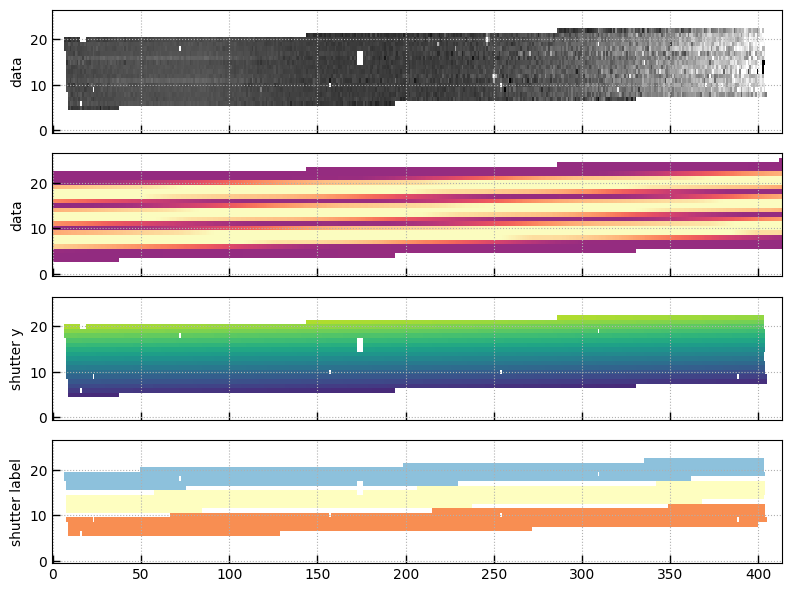

In [6]:
# Show one slitlet
fig, axes = plt.subplots(4,1,figsize=(8, 6), sharex=True, sharey=True)

# Data
ax = axes[0]
ax.imshow(obj.sci[0].reshape(obj.sh), aspect='auto', vmin=-0.1, vmax=0.5, cmap='gray')
ax.set_ylabel('data')

# CRDS bar shadow correction
ax = axes[1]
ax.imshow(obj.bar[0].reshape(obj.sh), aspect='auto', vmin=0, vmax=1, cmap='magma')
ax.set_ylabel('data')

# Show shutter coordinates
ax = axes[2]
shutter_y = obj.fixed_yshutter*1
shutter_y[~obj.mask] = np.nan

ax.imshow(shutter_y[0,:].reshape(obj.sh),
          aspect='auto', vmin=-2, vmax=2)
ax.set_ylabel('shutter y')

# Show distinct shutters
ax = axes[3]
shutter_index = np.cast[int](np.round(shutter_y))*1.
shutter_index[(obj.bar < 0.5) | ~np.isfinite(obj.sci)] = np.nan

ax.imshow(shutter_index[0,:].reshape(obj.sh),
          aspect='auto', vmin=-2, vmax=2, cmap='RdYlBu')

ax.set_ylabel('shutter label')

for ax in axes:
    ax.grid()
    
fig.tight_layout(pad=1)


## Compute average sky spectrum

Here just used to normalize the 2D arrays

100%|████████████████████████████████████████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 49.01it/s]


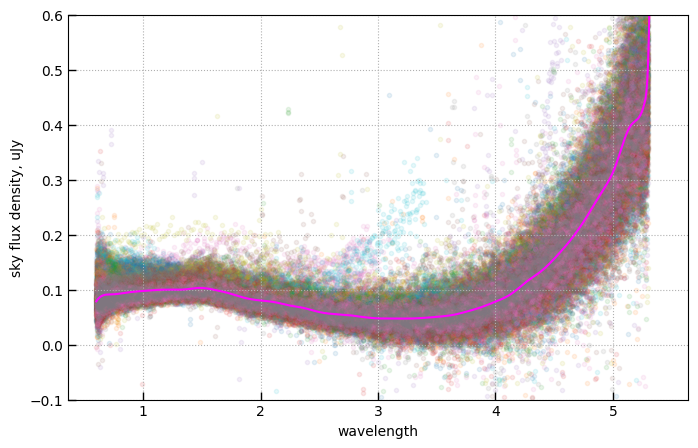

In [7]:
from tqdm import tqdm
import scipy.ndimage as nd

fig, ax = plt.subplots(1,1,figsize=(8, 5))

ydata = []
fdata = []
wdata = []

for k in tqdm(bobj):
    obj = bobj[k]
    if len(obj.meta["bad_shutter_names"]) > 0:
        continue

    # Just compute average from NRS2
    if 'nrs1' in k:
        continue
        
    sn = obj.sci*1

    # if obj.position_key == "manual_position":
    #     shutter_y = (obj.yshutter + obj.source_ypixel_position - 1)/5
    # else:
    #     shutter_y = (obj.yshutter + obj.source_ypixel_position)/5
    shutter_y = obj.fixed_yshutter
    
    y_shutter_index = (obj.yslit + 1)/5

    oky = np.isfinite(shutter_y + obj.bar + sn) & (sn > -0.1) & (sn < 2)

    shutter_mid = np.abs(y_shutter_index - np.round(y_shutter_index)) < 0.2
    shutter_mid &= np.isfinite(obj.wave + obj.sci)
    oky &= shutter_mid

    ax.scatter(obj.wave[oky], sn[oky], alpha=0.1)
    
    ydata.append(shutter_y[oky])
    wdata.append(obj.wave[oky])
    fdata.append(sn[oky])

ydata = np.hstack(ydata)
wdata = np.hstack(wdata)
fdata = np.hstack(fdata)

so = np.argsort(wdata)

sky_wave, sky_flux = wdata[so], nd.median_filter(fdata[so], 60)
okx = np.abs(fdata[so] - sky_flux) < 0.03
sky_wave, sky_flux = wdata[so][okx], nd.gaussian_filter(fdata[so][okx], 60)

# Fit cubic splines to sky
wrange = (0.6, 5.4)
sky_df = 41

bspl = utils.bspline_templates(wdata, df=sky_df, minmax=wrange, get_matrix=True)
splx = np.linspace(*wrange, 1024)
bsplm = utils.bspline_templates(splx, df=sky_df, minmax=wrange, get_matrix=True)
_csky = np.linalg.lstsq(bspl[so[okx],:], fdata[so][okx], rcond=None)
sply = bsplm.dot(_csky[0])

ax.plot(splx, sply, color='magenta')
ax.set_xlabel('wavelength')
ax.set_ylabel('sky flux density, uJy')

ax.set_ylim(-0.1, 0.6)
ax.grid()


## Compare individual sky spectra to average

Seem to be some trends as a function of detector position, which could indicate additional detector- and/or field-dependent corrections to the SFLAT.

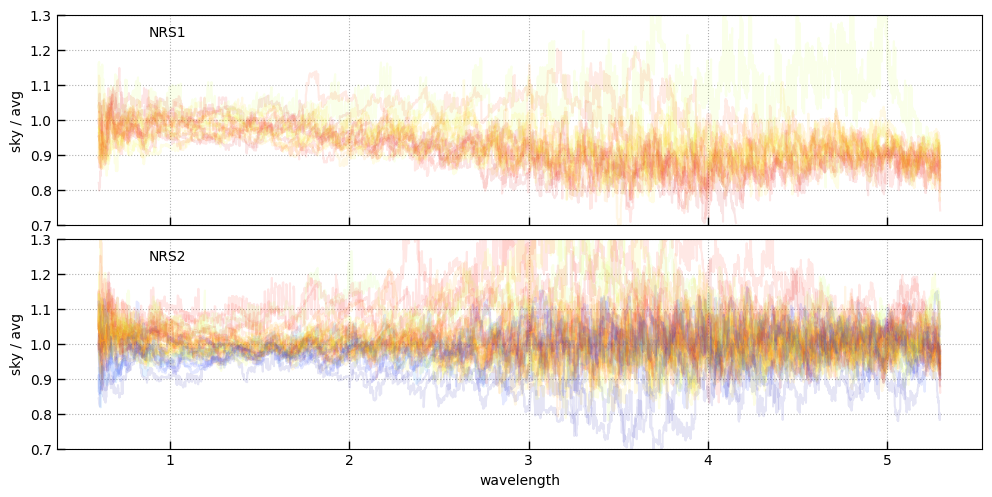

In [8]:
fig, axes = plt.subplots(2,1,figsize=(10,5), sharex=True, sharey=True)

for k in bobj:
    obj = bobj[k]

    if len(obj.meta["bad_shutter_names"]) > 0:
        continue

    if obj.slits[0].meta.instrument.detector == 'NRS1':
        ax = axes[0]
    else:
        ax = axes[1]
    
    y_shutter_index = (obj.yslit + 1)/5

    shutter_mid = np.abs(y_shutter_index - np.round(y_shutter_index)) < 0.2
    shutter_mid &= np.isfinite(obj.wave + obj.sci)
    
    so = np.argsort(obj.wave[shutter_mid])
    
    _sky_wave, _sky_flux = obj.wave[shutter_mid][so], nd.median_filter(obj.sci[shutter_mid][so], 60)    
    _spl = utils.bspline_templates(_sky_wave, df=sky_df, minmax=wrange, get_matrix=True)
    _sky_avg = _spl.dot(_csky[0])
    
    ax.plot(_sky_wave, _sky_flux / _sky_avg, alpha=0.1, color=plt.cm.jet(obj.slits[0].ystart/2048.))

for i, ax in enumerate(axes):
    ax.grid()
    ax.set_ylim(0.7, 1.3)
    ax.set_ylabel('sky / avg')
    ax.text(0.1, 0.95, f'NRS{i+1}', ha='left', va='top', transform=ax.transAxes)
    
ax.set_xlabel('wavelength')

fig.tight_layout(pad=1)

# Now compute average cross-dispersion profile

In [9]:
import eazy

ydata = []
fdata = []
wdata = []

for k in bobj:    
    obj = bobj[k]
    if len(obj.meta["bad_shutter_names"]) > 0:
        continue

    if 'nrs1' in k:
        continue
    
    _spl = utils.bspline_templates(obj.wave.flatten(), df=sky_df, minmax=wrange, get_matrix=True)
    _sky = _spl.dot(_csky[0]).reshape(obj.wave.shape)

    # Data is science data / average sky * bar (to undo the bar correction)
    sn = obj.sci*1 / _sky * obj.bar
    shutter_y = obj.fixed_yshutter
        
    oky = np.isfinite(shutter_y + obj.bar + sn) & (sn > 0) & (sn < 2)
    scale_sky = np.nanmedian((sn/obj.bar)[oky & (obj.bar > 0.95)])
    print(k, scale_sky)
    if scale_sky > 1.03:
        continue
    
    sn /= scale_sky

    oky &= np.abs(shutter_y) < 1.5
    
    if 0:
        # Try just computing a single shutter
        shutter_y = ((shutter_y + 0.5) % 1) - 0.5

    ydata.append(shutter_y[oky])
    wdata.append(obj.wave[oky])
    fdata.append(sn[oky])

ydata = np.hstack(ydata)
wdata = np.hstack(wdata)
fdata = np.hstack(fdata)


nrs2.003 0.9613541162714639
nrs2.009 0.9497469236248415
nrs2.014 0.937747985598309
nrs2.016 0.9473550916024387
nrs2.018 0.9452606651203912
nrs2.019 0.8620254682417685
nrs2.021 0.9913224674750885
nrs2.022 0.9516836939455404
nrs2.023 0.9616684161786755
nrs2.026 0.9445295275519042
nrs2.027 0.9228895428423114
nrs2.030 0.955878510209942
nrs2.036 0.9534494132014413
nrs2.037 0.9515928992868853
nrs2.042 0.9567971929147068
nrs2.043 1.0624452126925403
nrs2.048 0.9534892307758319
nrs2.049 0.960764812333728
nrs2.050 0.9637133524052781
nrs2.052 1.0056333429327875
nrs2.053 0.9497924561268986
nrs2.054 0.9428519076083935
nrs2.055 1.0148960297931202
nrs2.056 0.9435552298466228
nrs2.058 0.9641391510867033
nrs2.060 0.963409263959708
nrs2.064 0.9613421628512829
nrs2.067 0.9672230855975352
nrs2.069 1.0272043879955077
nrs2.073 0.9880804092271804
nrs2.075 0.9771677038856477
nrs2.078 0.9435160546008737
nrs2.080 0.9486690883850639
nrs2.087 0.8971147988713315
nrs2.088 0.9654734271481125
nrs2.092 0.9496174376759

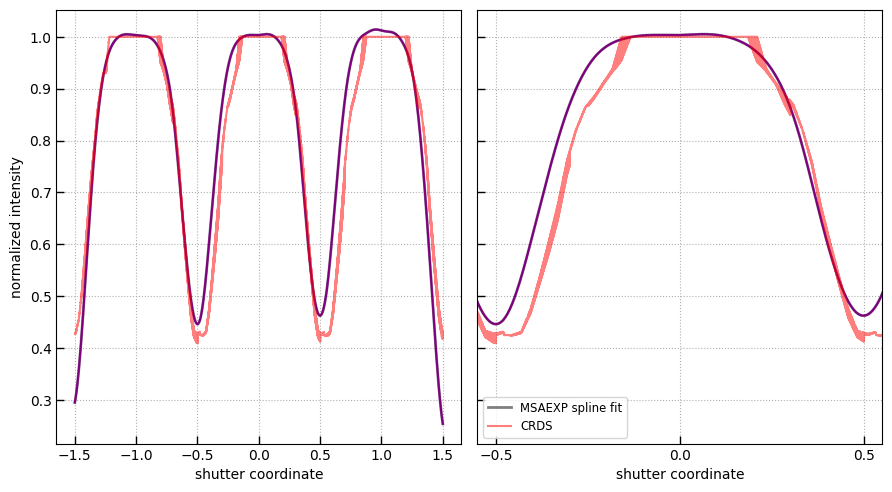

In [10]:
# Spline parameters
bar_df = 51
bar_df = 41

bar_minmax = (-1.5, 1.5)

# If wrapped on central shutter
if np.nanmin(ydata) > -1:
    bar_minmax = (-0.5, 0.5)
    bar_df = 31

# bins = np.linspace(*bar_minmax, 256)
# xb, yb, ys, yn = eazy.utils.running_median(ydata, fdata, bins=bins, 
#                                           x_func=np.mean, y_func=np.mean)

# Fit splines to the bar data
bspl = utils.bspline_templates(ydata, df=bar_df, get_matrix=True, minmax=bar_minmax)
_c = np.linalg.lstsq(bspl, fdata, rcond=None)
_cm = bspl.dot(_c[0])
ok2 = np.abs(fdata/_cm-1) < 0.2
bar_coeffs = np.linalg.lstsq(bspl[ok2,:], fdata[ok2], rcond=None)
_cm = bspl.dot(bar_coeffs[0])

# bbar = utils.bspline_templates(shutter_y.flatten(), df=df, get_matrix=True, minmax=minmax)
# cbar = bbar.dot(_c[0]).reshape(shutter_y.shape)

xbin = np.linspace(*bar_minmax, 1024)
sbin = utils.bspline_templates(xbin, df=bar_df, get_matrix=True, minmax=bar_minmax)
cbin = sbin.dot(bar_coeffs[0])

msa_bar, _wrapped = msaexp.utils.get_prism_bar_correction(xbin)

fig, axes = plt.subplots(1,2,figsize=(9,5), sharey=True)
axes[0].set_ylabel('normalized intensity')

for ax in axes:
    ax.plot(xbin, msa_bar, color='magenta')
    
    ax.plot(xbin, cbin, color='k', alpha=0.5, lw=2, label='MSAEXP spline fit')
    so = np.argsort(shutter_y[oky])
    
    # Just show a single wavelength
    ax.plot(shutter_y[oky][so], obj.bar[oky][so], color='r', alpha=0.5, label='CRDS')
    ax.set_xlabel('shutter coordinate')
    ax.grid()

axes[1].set_xlim(-0.55, 0.55)
axes[1].set_xticks([-0.5, 0, 0.5])

ax.legend()
fig.tight_layout(pad=1)


# Coefficients saved to [msaexp/data/prism_bar_coeffs.yaml](https://github.com/gbrammer/msaexp/blob/main/msaexp/data/prism_bar_coeffs.yaml)

In [11]:
import yaml

bar_spline = {}
bar_spline['coeffs'] = [float(_ci) for _ci in bar_coeffs[0]]
bar_spline['minmax'] = list(bar_minmax)

print(yaml.dump(bar_spline))

coeffs:
- 0.29528866169628143
- 0.32627439947051057
- 0.49891391494418363
- 0.7959078223703476
- 0.9486573759214098
- 0.9945489836235116
- 1.0065469728068124
- 1.003466157445691
- 1.0022215928157308
- 0.9995681853261181
- 0.9713466867667345
- 0.8990669739497082
- 0.6819666749243963
- 0.46518193530762847
- 0.415693447690736
- 0.6321756645859377
- 0.8546990201694741
- 0.9708973773498646
- 0.9987552221661544
- 1.0049212637554383
- 1.0019544358447383
- 1.0075075173899986
- 0.9973806266270332
- 0.9616290238288046
- 0.8555391260915437
- 0.6036932568295645
- 0.43991499088289665
- 0.4748581964413843
- 0.7173532978888152
- 0.9152986938539373
- 0.99358885554297
- 1.0059182779231848
- 1.0172816568299359
- 1.0091071228439543
- 1.0109458736030332
- 0.9886565027570043
- 0.9364833379326772
- 0.7553504429265848
- 0.472133335043325
- 0.29372143738665435
- 0.25407034723530897
minmax:
- -1.5
- 1.5



# Make a figure showing a single slitlet and the bar residuals

In [12]:
for k in bobj:    
    obj = bobj[k]
    if len(obj.meta["bad_shutter_names"]) > 0:
        continue
    if 'nrs1' in k:
        continue
    print(k)
    break


nrs2.003


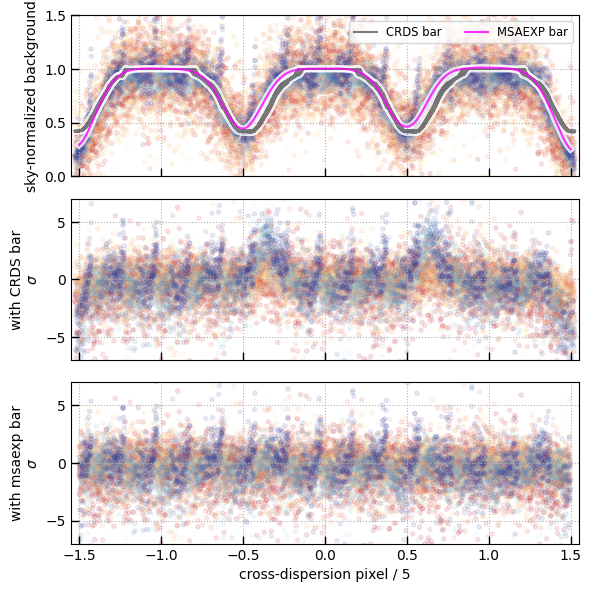

In [13]:
sn = obj.sci / np.sqrt(obj.var)

_spl = utils.bspline_templates(obj.wave.flatten(), df=sky_df, minmax=wrange, get_matrix=True)
_sky = _spl.dot(_csky[0]).reshape(obj.wave.shape)
sn = obj.sci*1 / _sky

shutter_y = obj.fixed_yshutter
cbar, _warp = msaexp.utils.get_prism_bar_correction(shutter_y, wrap=False)

cmap = 'RdYlBu_r'

fig, axes = plt.subplots(3,1,figsize=(6,6), sharex=True, sharey=False)

wso = np.argsort(obj.wave.flatten())[::-1]

# CRDS-corrected
ax = axes[1]
ax.scatter(shutter_y.flatten()[wso], ((sn - 1) / (np.sqrt(obj.var) / _sky)).flatten()[wso],
           alpha=0.1, c=obj.wave.flatten()[wso], vmin=0.7, vmax=5, cmap=cmap)

# This corrected
ax = axes[2]
oky = np.isfinite(shutter_y + obj.bar + sn) & (sn > 0) & (sn < 2)
so = np.argsort(shutter_y[oky])
dy = 0.03

ax.scatter(shutter_y.flatten()[wso],
           ((sn*obj.bar / cbar - 1) / (np.sqrt(obj.var) / _sky * obj.bar / cbar)).flatten()[wso], 
           alpha=0.1, c=obj.wave.flatten()[wso], vmin=0.7, vmax=5, cmap=cmap)


# Original data undoing CRDS correction
ax = axes[0]
ax.scatter(shutter_y.flatten()[wso],
           (sn*obj.bar).flatten()[wso],
           alpha=0.1,
           c=obj.wave.flatten()[wso],
           vmin=0.7, vmax=5, zorder=-1, cmap=cmap)

# Show CRDS and this correction
xso = np.argsort(shutter_y.flatten())
ax.plot(shutter_y.flatten()[xso], obj.bar.flatten()[xso], alpha=0.8, lw=5, color='w', zorder=1)
ax.plot(shutter_y.flatten()[xso], obj.bar.flatten()[xso], alpha=0.5, color='k', label='CRDS bar', zorder=10)

# MSAEXP correction
my_bar, _wrapped = msaexp.utils.get_prism_bar_correction(xbin)
ax.plot(xbin, my_bar, color='w', alpha=0.8, zorder=1, lw=5)
ax.plot(xbin, my_bar, color='magenta', alpha=0.8, label='MSAEXP bar', zorder=11)

ax.legend(ncol=2, loc='upper right')

ax.set_xticks(np.arange(-2, 2.1, 0.5))
ax.set_xlim(-1.55, 1.55)

axes[0].set_ylim(0, 1.5)   
for ax in axes[1:]:
    ax.set_ylim(-7, 7)

axes[2].set_xlabel('cross-dispersion pixel / 5')
axes[0].set_ylabel('sky-normalized background')
axes[1].set_ylabel('with CRDS bar\n' + r'$\sigma$')
axes[2].set_ylabel('with msaexp bar\n' + r'$\sigma$')

for ax in axes:
    ax.grid()

fig.tight_layout(pad=1)
fig.savefig('diagnose_bar_correction.png')


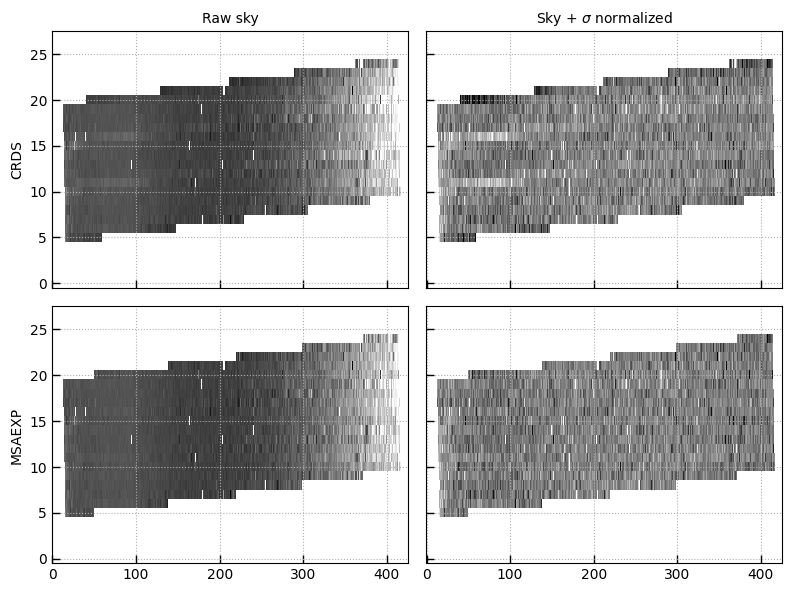

In [15]:
# Show the correction on one cutout

fig, axes = plt.subplots(2,2,figsize=(8, 6), sharex=True, sharey=True)

# Data
ax = axes[0][0]
ax.imshow(obj.sci[0].reshape(obj.sh), aspect='auto', vmin=-0.1, vmax=0.5, cmap='gray')
ax.set_ylabel('CRDS')
ax.set_title('Raw sky')

ax = axes[0][1]
ax.imshow(((obj.sci / _sky - 1) / (np.sqrt(obj.var)/ _sky))[0].reshape(obj.sh),
          aspect='auto', vmin=-7, vmax=7, cmap='gray')
ax.set_title(r'Sky + $\sigma$ normalized')

# Updated correction
ax = axes[1][0]
ax.imshow((obj.sci*obj.bar/cbar)[0].reshape(obj.sh), aspect='auto', vmin=-0.1, vmax=0.5, cmap='gray')
ax.set_ylabel('MSAEXP')
ax = axes[1][1]
ax.imshow(((obj.sci * obj.bar/cbar / _sky - 1) / (np.sqrt(obj.var) * obj.bar / cbar / _sky))[0].reshape(obj.sh),
          aspect='auto', vmin=-7, vmax=7, cmap='gray')

for i in range(2):
    for j in range(2):
        axes[i][j].grid()
        
fig.tight_layout(pad=1)
